In [211]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [212]:
df=pd.read_csv(r"C:\Users\gkish\Downloads\Machine Learning\Insurance\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [213]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [214]:
df.shape

(1338, 7)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [216]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [217]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [218]:
df.duplicated().sum()

1

In [219]:
df.drop_duplicates(keep='first',inplace=True)

In [220]:
df.reset_index(drop=True,inplace=True)


In [221]:
df.shape

(1337, 7)

In [222]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

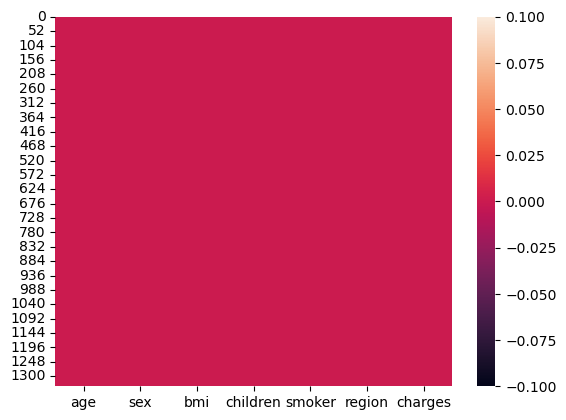

In [223]:
sns.heatmap(df.isnull())

### target variable(charges)¶

In [224]:
df.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

(array([535., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

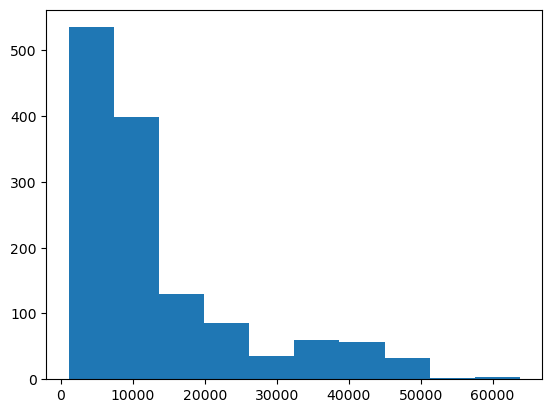

In [225]:
plt.hist(df.charges)

<AxesSubplot:xlabel='charges', ylabel='Density'>

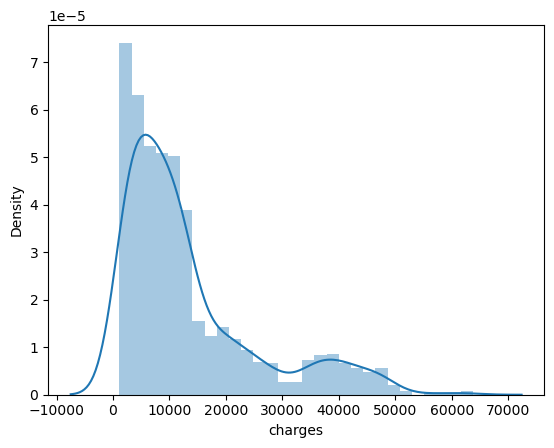

In [226]:
# Will check the distribution of the data
sns.distplot(df.charges)

<AxesSubplot:xlabel='charges'>

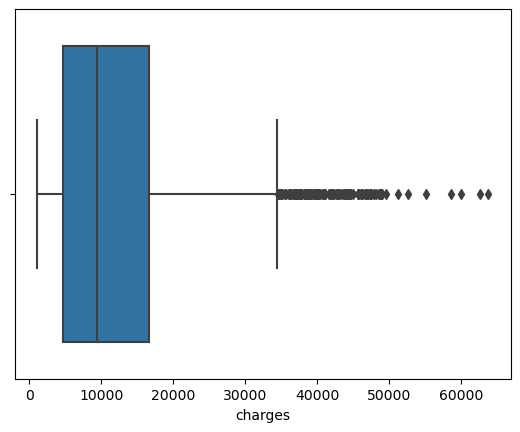

In [227]:
sns.boxplot(df.charges)

## Now will check for outliers (If we have extreme outliers we need to drop the outliers)

In [228]:
# How many outliers are present
# checking the outliers

# Now we are going to perform IQR [Inter Quartile Range] using IQR = Q3 - Q1
kpl_IQR=df.charges.describe()['75%']-df.charges.describe()['25%']
print('kpl_IQR =',kpl_IQR)

# Now will try to create upper end using UE= Q3+1.5*IQR
kpl_uplim=df.charges.describe()['75%']+1.5*kpl_IQR         
print('kpl_uplim =',kpl_uplim)

kpl_IQR = 11911.37345
kpl_uplim = 34524.777625


In [229]:
len(df.charges[df.charges>kpl_uplim])

139

In [230]:
df1=df.copy(deep=True)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [231]:
df['charges']=np.log(df.charges)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,9.268661
1333,18,female,31.920,0,no,northeast,7.698927
1334,18,female,36.850,0,no,southeast,7.396233
1335,21,female,25.800,0,no,southwest,7.604867


<AxesSubplot:xlabel='charges', ylabel='Density'>

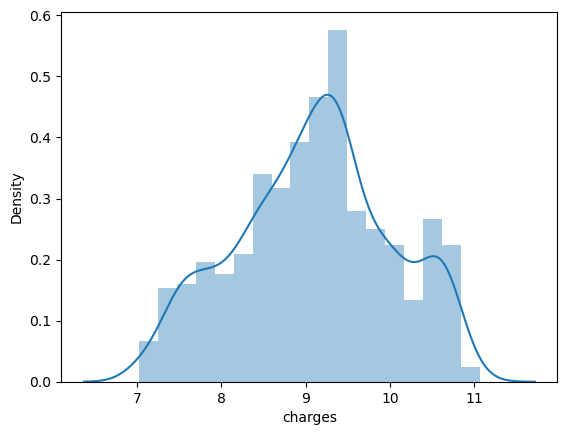

In [232]:
sns.distplot(df.charges)

<AxesSubplot:xlabel='charges'>

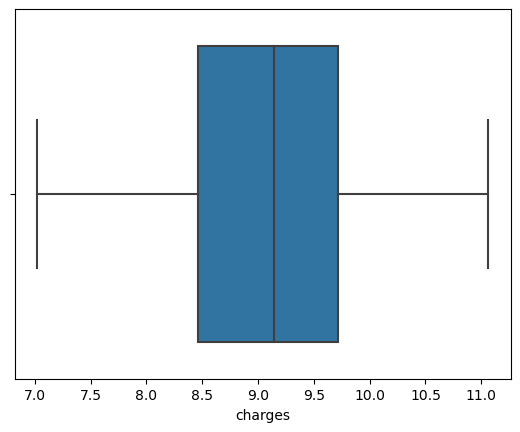

In [233]:
sns.boxplot(df.charges)

## independents


## sex (its a categorical variable)

In [234]:
df.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [235]:
df.sex.describe()

count     1337
unique       2
top       male
freq       675
Name: sex, dtype: object

<AxesSubplot:xlabel='sex', ylabel='count'>

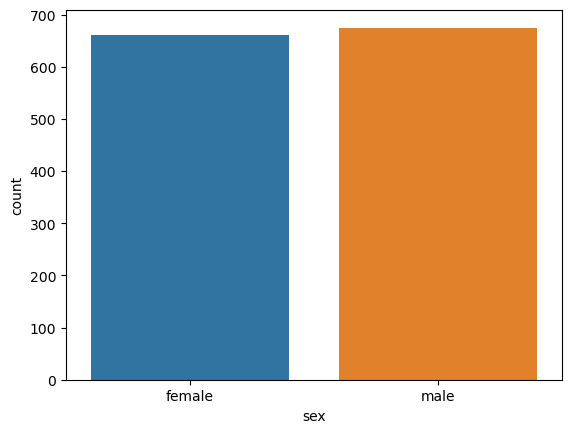

In [236]:
sns.countplot(df.sex)

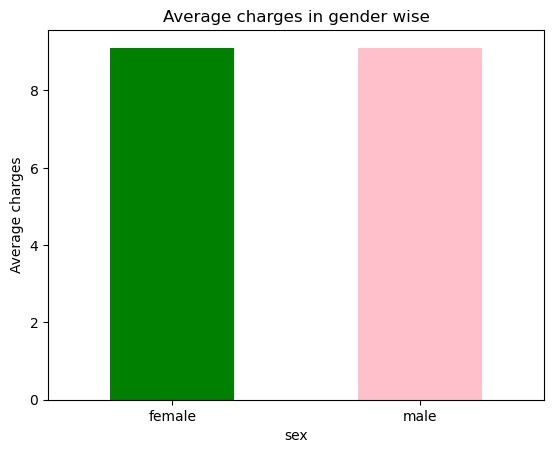

In [237]:
df.groupby('sex')['charges'].mean().plot(kind='bar',color=['green','pink'])
plt.ylabel('Average charges')
plt.xticks(rotation=0)
plt.title('Average charges in gender wise')
plt.show()

In [238]:
df.groupby('sex')['charges'].mean()


sex
female    9.093428
male      9.106302
Name: charges, dtype: float64

* the avg charges for male is higher than the female charges

### Now will perform some statistical test to check sex is a good predictor or not

## Importing the Libraries for Statistical test

In [239]:
# Statistical test

# t-test
from scipy.stats import ttest_ind
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# chi-square
from scipy.stats import (chi2,chi2_contingency)
import statsmodels.formula.api as smf

# Anova Test

In [240]:
model_sex = ols('charges ~ sex',data = df).fit()
anova_sex = sm.stats.anova_lm(model_sex)
anova_sex

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,0.055401,0.055401,0.065594,0.797902
Residual,1335.0,1127.538183,0.844598,NaN,NaN


* Gender is a bad predictor (If the p_value is more than level of significance that is 0.05 then it is a bad predictor)
* If the P-value is greater than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is not statistically significant.

# age

In [241]:
df.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

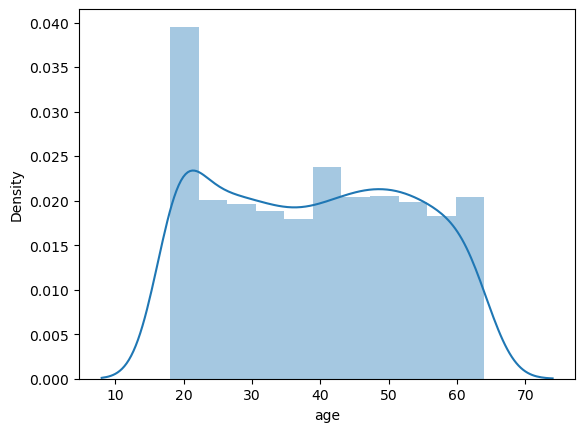

In [242]:
sns.distplot(df.age)

<AxesSubplot:xlabel='age'>

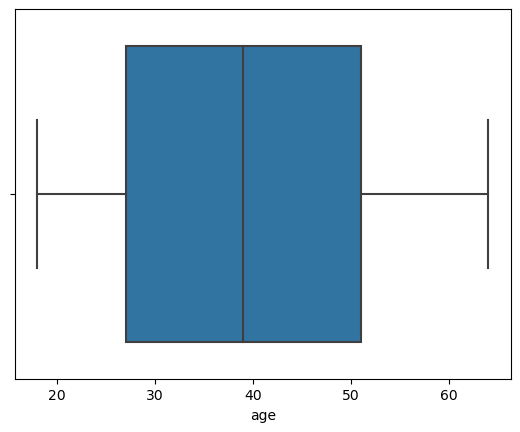

In [243]:
sns.boxplot(df.age)

In [244]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

(array([221., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

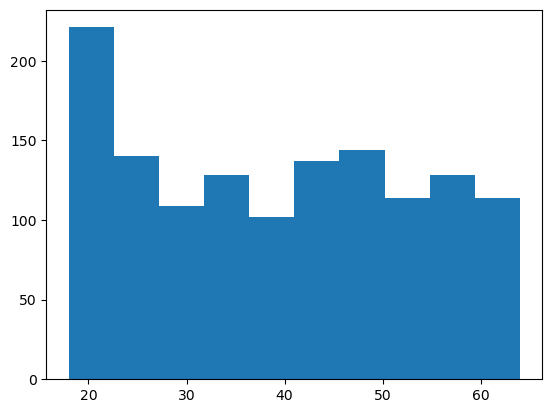

In [245]:
plt.hist(df.age)

<AxesSubplot:xlabel='age', ylabel='charges'>

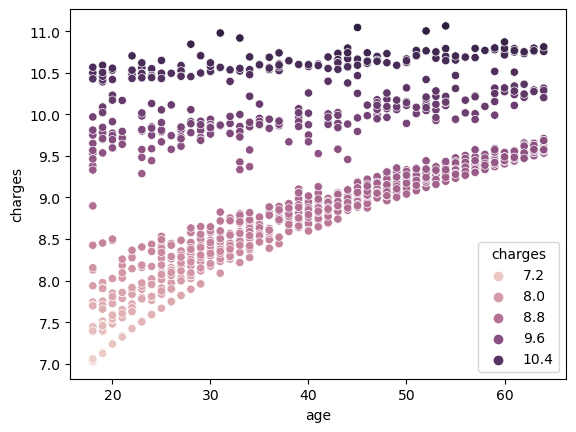

In [246]:
sns.scatterplot(x='age',y='charges',data=df,hue='charges')

In [247]:
bi=(0,30,40,50,60,100)
label=('0-29','30-39','40-49','50-59','60+')
df['Age_group']=pd.cut(df.age,bins=bi,labels=label)
df

,age,sex,bmi,children,smoker,region,charges,Age_group
0,19,female,27.900,0,yes,southwest,9.734176,0-29
1,18,male,33.770,1,no,southeast,7.453302,0-29
2,28,male,33.000,3,no,southeast,8.400538,0-29
3,33,male,22.705,0,no,northwest,9.998092,30-39
4,32,male,28.880,0,no,northwest,8.260197,30-39
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,9.268661,40-49
1333,18,female,31.920,0,no,northeast,7.698927,0-29
1334,18,female,36.850,0,no,southeast,7.396233,0-29
1335,21,female,25.800,0,no,southwest,7.604867,0-29


In [248]:
df['Age_group'].value_counts()

0-29     443
40-49    281
50-59    265
30-39    257
60+       91
Name: Age_group, dtype: int64

<AxesSubplot:xlabel='Age_group', ylabel='count'>

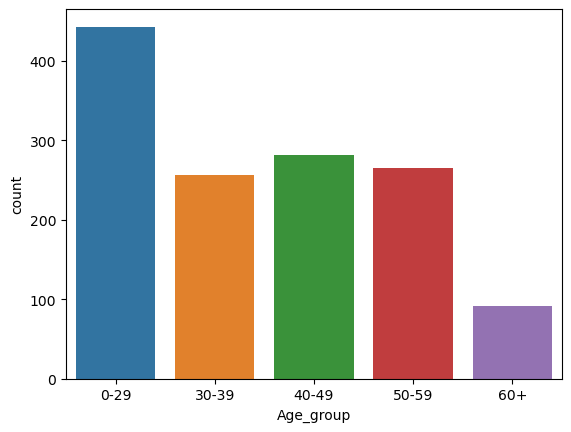

In [249]:
sns.countplot(df.Age_group)

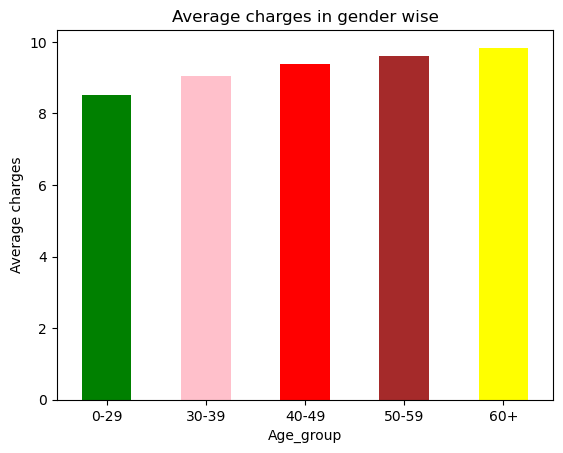

In [250]:
df.groupby('Age_group')['charges'].mean().plot(kind='bar',color=['green','pink','red','brown','yellow'])
plt.ylabel('Average charges')
plt.xticks(rotation=0)
plt.title('Average charges in gender wise')
plt.show()

In [265]:
df.Age_group = df.Age_group.astype('object')

In [271]:
model_sex = ols('charges ~ Age_group',data = df).fit()
anova_sex = sm.stats.anova_lm(model_sex)
anova_sex

,df,sum_sq,mean_sq,F,PR(>F)
Age_group,4.0,290.676040,72.669010,115.6567,1.023961e-84
Residual,1332.0,836.917544,0.628316,NaN,NaN


In [268]:
df.dtypes

age            int64
sex           object
bmi          float64
children      object
smoker        object
region        object
charges      float64
Age_group     object
dtype: object

* Age Group is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)
* If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant.

# children

In [258]:
df.children = df.children.astype('object')

In [272]:
df.dtypes

age            int64
sex           object
bmi          float64
children      object
smoker        object
region        object
charges      float64
Age_group     object
dtype: object

In [273]:
df.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

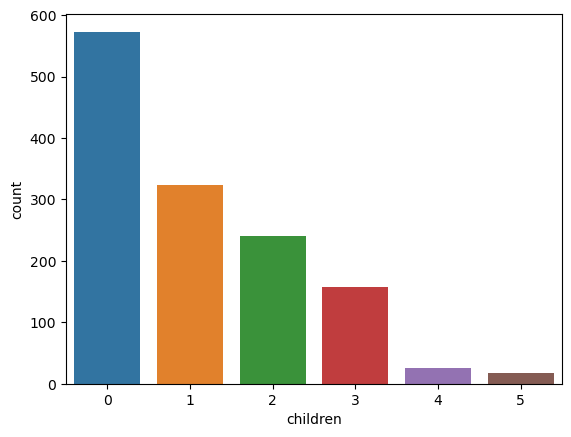

In [274]:
sns.countplot(x= df.children)

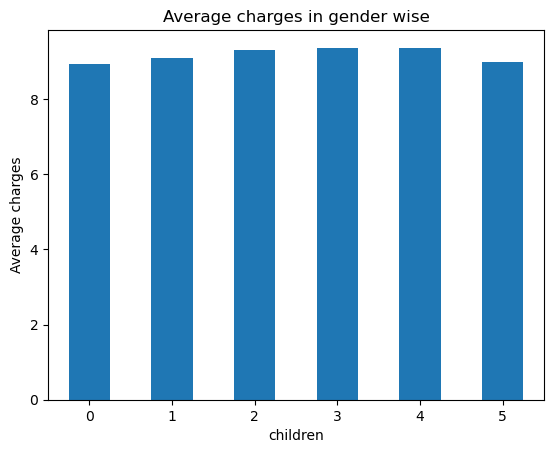

In [275]:
df.groupby('children')['charges'].mean().plot(kind='bar')
plt.ylabel('Average charges')
plt.xticks(rotation=0)
plt.title('Average charges in gender wise')
plt.show()

In [276]:
df.groupby('children')['charges'].mean()

children
0    8.937849
1    9.094811
2    9.298261
3    9.368913
4    9.359017
5    9.001097
Name: charges, dtype: float64

In [277]:
model_children = ols('charges ~ children',data = df).fit()
anova_children = sm.stats.anova_lm(model_children)
anova_children

,df,sum_sq,mean_sq,F,PR(>F)
children,5.0,37.714992,7.542998,9.211788,1.242694e-08
Residual,1331.0,1089.878591,0.818842,NaN,NaN


* Children is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)
* If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant.

# Smoker

In [278]:
df.smoker.describe()

count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object

In [279]:
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

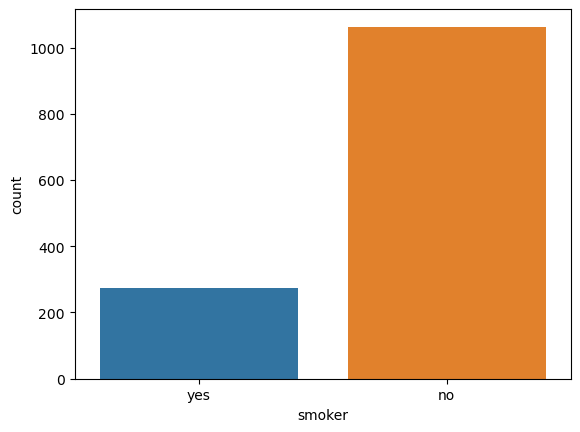

In [280]:
sns.countplot(x=df.smoker)

In [281]:
df.groupby('smoker')['charges'].mean()

smoker
no      8.789536
yes    10.304110
Name: charges, dtype: float64

In [282]:
model_smoker = ols('charges ~ smoker',data = df).fit()
anova_smoker = sm.stats.anova_lm(model_smoker)
anova_smoker

,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,499.727153,499.727153,1062.544067,6.025059e-172
Residual,1335.0,627.866430,0.470312,NaN,NaN


* Smoker is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)
* If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant.

# Region

In [283]:
df.region.describe()

count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [284]:
df.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

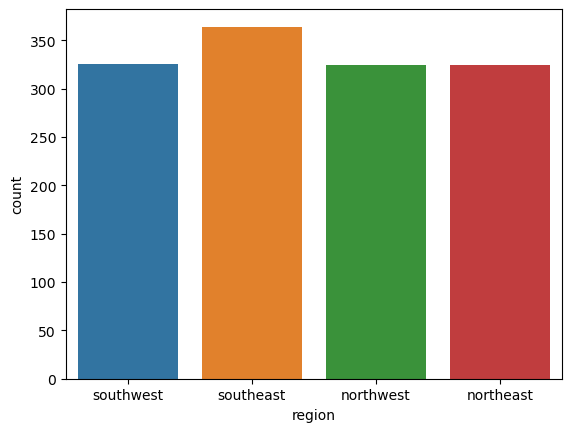

In [285]:
sns.countplot(x=df.region)

In [286]:
df.groupby('region')['charges'].mean()

region
northeast    9.168768
northwest    9.074880
southeast    9.122402
southwest    9.031098
Name: charges, dtype: float64

In [287]:
model_region = ols('charges ~ region',data = df).fit()
anova_region= sm.stats.anova_lm(model_region)
anova_region

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,3.462254,1.154085,1.368519,0.250785
Residual,1333.0,1124.131330,0.843309,NaN,NaN


* Region is a bad predictor (If the p_value is greater than level of significance that is 0.05 then it is a bad predictor)
* If the P-value is larger than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is not statistically significant.

# BMI

In [291]:
df.bmi.describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

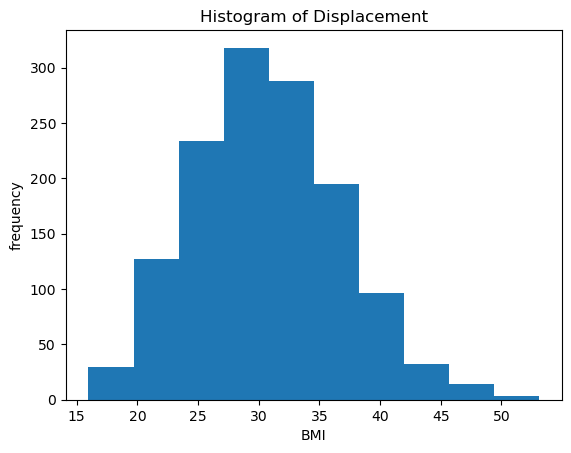

In [295]:
# histogram 
plt.hist(df.bmi)
plt.xlabel('BMI')
plt.ylabel('frequency')
plt.title('Histogram of Displacement')
plt.show()

<AxesSubplot:xlabel='bmi'>

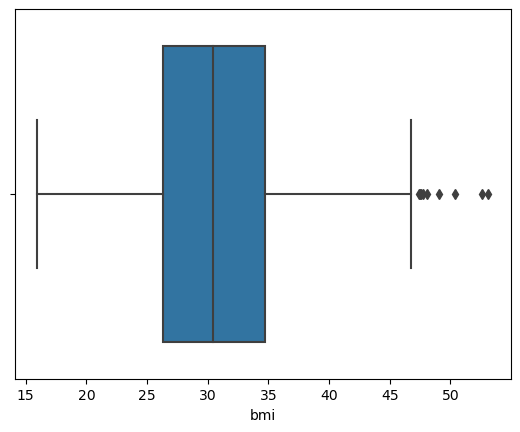

In [296]:
sns.boxplot(df.bmi)

In [297]:
df2=df.copy(deep=True)

In [301]:
q1=26.290000
q3=34.700000
print('q1=',q1,'\n','q3=',q3)
iqr=q3-q1
print('iqr=',iqr)

q1= 26.29 
 q3= 34.7
iqr= 8.410000000000004


In [302]:
Le=q1-1.5*iqr
He=q3+1.5*iqr
print(f'LE= {Le}\nHE= {He}')

LE= 13.674999999999994
HE= 47.31500000000001


In [303]:
df = df[~(df['bmi'] > He) | (df['bmi'] < Le)]
df.reset_index(inplace=True)
df

,index,age,sex,bmi,children,smoker,region,charges,Age_group
0,0,19,female,27.900,0,yes,southwest,9.734176,0-29
1,1,18,male,33.770,1,no,southeast,7.453302,0-29
2,2,28,male,33.000,3,no,southeast,8.400538,0-29
3,3,33,male,22.705,0,no,northwest,9.998092,30-39
4,4,32,male,28.880,0,no,northwest,8.260197,30-39
...,...,...,...,...,...,...,...,...,...
1323,1332,50,male,30.970,3,no,northwest,9.268661,40-49
1324,1333,18,female,31.920,0,no,northeast,7.698927,0-29
1325,1334,18,female,36.850,0,no,southeast,7.396233,0-29
1326,1335,21,female,25.800,0,no,southwest,7.604867,0-29


<AxesSubplot:xlabel='bmi'>

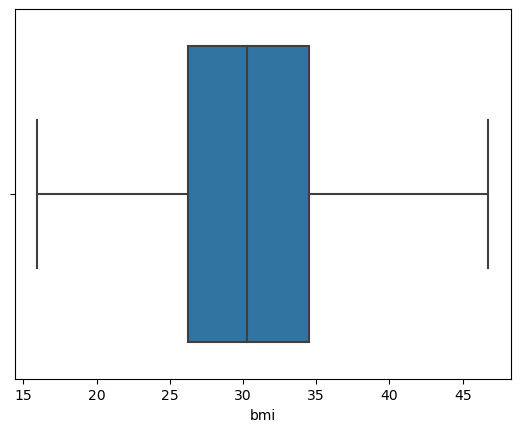

In [304]:
sns.boxplot(df.bmi)

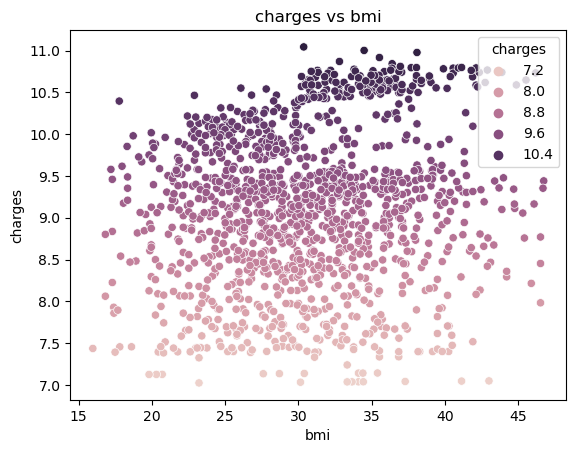

In [305]:
# scatterplot of Kilometer_per_liter vs displacement
sns.scatterplot(x='bmi',y='charges',data=df,hue='charges')
plt.title('charges vs bmi')
plt.show()

In [306]:
np.corrcoef(df.bmi,df.charges)

array([[1.        , 0.13409761],
       [0.13409761, 1.        ]])

* Since it has no association, Bmi is a bad predictor

In [312]:
df3=df.copy(deep=True)
df3.head()

,index,age,sex,bmi,children,smoker,region,charges,Age_group
0,0,19,female,27.900,0,yes,southwest,9.734176,0-29
1,1,18,male,33.770,1,no,southeast,7.453302,0-29
2,2,28,male,33.000,3,no,southeast,8.400538,0-29
3,3,33,male,22.705,0,no,northwest,9.998092,30-39
4,4,32,male,28.880,0,no,northwest,8.260197,30-39


In [314]:
df3

,age,sex,bmi,children,smoker,region,charges,Age_group
0,19,female,27.900,0,yes,southwest,9.734176,0-29
1,18,male,33.770,1,no,southeast,7.453302,0-29
2,28,male,33.000,3,no,southeast,8.400538,0-29
3,33,male,22.705,0,no,northwest,9.998092,30-39
4,32,male,28.880,0,no,northwest,8.260197,30-39
...,...,...,...,...,...,...,...,...
1323,50,male,30.970,3,no,northwest,9.268661,40-49
1324,18,female,31.920,0,no,northeast,7.698927,0-29
1325,18,female,36.850,0,no,southeast,7.396233,0-29
1326,21,female,25.800,0,no,southwest,7.604867,0-29


In [315]:
df=df3.copy(deep=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,Age_group
0,19,female,27.900,0,yes,southwest,9.734176,0-29
1,18,male,33.770,1,no,southeast,7.453302,0-29
2,28,male,33.000,3,no,southeast,8.400538,0-29
3,33,male,22.705,0,no,northwest,9.998092,30-39
4,32,male,28.880,0,no,northwest,8.260197,30-39


In [316]:
x1=df.drop(['age','bmi','sex','charges','region'],axis=1)
x1.head()

,children,smoker,Age_group
0,0,yes,0-29
1,1,no,0-29
2,3,no,0-29
3,0,no,30-39
4,0,no,30-39


In [317]:
x = pd.get_dummies(x1, columns=['children', 'smoker','Age_group'], prefix=['children', 'smoker','Age_group'],drop_first=True)
x

,children_1,children_2,children_3,children_4,children_5,smoker_yes,Age_group_30-39,Age_group_40-49,Age_group_50-59,Age_group_60+
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1323,0,0,1,0,0,0,0,1,0,0
1324,0,0,0,0,0,0,0,0,0,0
1325,0,0,0,0,0,0,0,0,0,0
1326,0,0,0,0,0,0,0,0,0,0


In [320]:
y=df.charges
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

In [330]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.20,random_state=5)  #train_size is 80%

In [331]:
x_train.head()

,children_1,children_2,children_3,children_4,children_5,smoker_yes,Age_group_30-39,Age_group_40-49,Age_group_50-59,Age_group_60+
754,0,0,0,0,0,1,0,0,0,0
288,0,0,0,0,0,0,0,0,0,0
1017,1,0,0,0,0,0,0,1,0,0
447,0,0,0,1,0,0,1,0,0,0
326,1,0,0,0,0,1,0,0,0,1


In [332]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)    #only for train we use fit
x_test=sc_x.transform(x_test)          # don't use fit for test data

In [333]:
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (1062, 10)
x_test = (266, 10)
y_train = (1062,)
y_test = (266,)


In [334]:
# after standartizing build the model
# building the model
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)
score=sgdr.score(x_train,y_train)
print('R-squared =',score)

R-squared = 0.7433865646234328


In [335]:
from sklearn.metrics import r2_score
y_test_pred=sgdr.predict(x_test)
r2_score(y_test,y_test_pred)

0.7059413765391388

In [336]:
# prediction
y_pred=sgdr.predict(x_test)

# evaluating the prediction

from sklearn.metrics import mean_squared_error          # to find the MSE (error)
mse=mean_squared_error(y_test,y_pred)
print('MSE =',mse)
print('RMSE =',np.sqrt(mse))

MSE = 0.24512326604885437
RMSE = 0.4950992486854069


In [337]:
from sklearn.linear_model import LinearRegression

In [338]:
lr=LinearRegression()
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

#Now will check the MSE of the model
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)
print('train_mse =',train_mse)
print('test_mse =',test_mse)

# Now will check the r2_score 
train_r2_score=r2_score(y_train,train_pred)
test_r2_score=r2_score(y_test,test_pred)
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)

train_mse = 0.21509942709524857
test_mse = 0.24437945809148393
train_r2_score = 0.7434768232413307
test_r2_score = 0.7068336751266584
